In [1]:
# Pendefinisian fungsi dan kelas yang digunakan 
# Import library keras dan lain-lain 
import numpy as np # For matrix math 
from numpy import loadtxt 
import matplotlib.pyplot as plt # For plotting 
import keras 
from keras.models import Sequential 
from keras.utils import to_categorical 
from keras.layers import Flatten, Dense, Activation 
from IPython.display import clear_output 

In [2]:
def normalisasi(x):
    a = np.max(x)
    b = np.min(x)
    for i in x:
        hasil_normalisasi = (0.8 * (x - b))/(a-b) + 0.1
    return hasil_normalisasi

In [3]:
import numpy as np

# Load the data latih
# Data Tingkat Kelahiran mulai Tahun 19991 sampai dengan Tahun 2022

AKI = np.genfromtxt('angka_kelahiran_indonesia.csv', delimiter=',', filling_values=0.0)
AKI_normal = normalisasi(AKI)

AKI_Target = AKI[:, 10]
AKI_Target_Uji = AKI[:, 11]

# DATA PELATIHAN =================================
# Data dibagi menjadi 10 variabel input (X) dan 1 variabel output (Y)
# Input: mulai tahun 1991 sampai tahun 2022
X = AKI_normal[:, 0:10]

# Output: data AKI tahun 2018 dan 2020
Y = AKI_normal[:, 10]

# DATA UJI PREDIKSI=================================
# Geser dua tahun ke depan
# Input: mulai tahun 1991 sampai tahun 2022
# Untuk memprediksi AKI Tahun 2021 dan 2022
X1 = AKI_normal[:, 1:11]

# Urut tahun, menggantikan indeks dari 0 s.d 1
urut = [1, 2]



In [4]:
print(AKI)

[[3.06 2.88 2.8  2.74 2.58 2.5  2.43 2.43 2.49 2.46 2.5  2.43 2.34 2.26
  2.21 2.17]
 [2.94 2.84 2.77 2.65 2.54 2.46 2.42 2.45 2.48 2.45 2.49 2.39 2.31 2.23
  2.19 2.15]]


In [5]:
AKI_normal = normalisasi(AKI)
print(AKI_normal)

[[0.9        0.74175824 0.67142857 0.61868132 0.47802198 0.40769231
  0.34615385 0.34615385 0.3989011  0.37252747 0.40769231 0.34615385
  0.26703297 0.1967033  0.15274725 0.11758242]
 [0.79450549 0.70659341 0.64505495 0.53956044 0.44285714 0.37252747
  0.33736264 0.36373626 0.39010989 0.36373626 0.3989011  0.31098901
  0.24065934 0.17032967 0.13516484 0.1       ]]


In [6]:
baris, kolom = AKI.shape
print("barisnya =",baris)
print("kolomnya =",kolom)

barisnya = 2
kolomnya = 16


In [7]:
baris, kolom = AKI_normal.shape
print("barisnya =",baris)
print("kolomnya =",kolom)

barisnya = 2
kolomnya = 16


In [8]:
baris, kolom = X.shape
print("barisnya =",baris)
print("kolomnya =",kolom)

barisnya = 2
kolomnya = 10


In [9]:
# Mendefinisikan model keras
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
# Proses kompilasi (pelatihan) Deep Learning
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [11]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show();
        
plot_losses = PlotLosses()

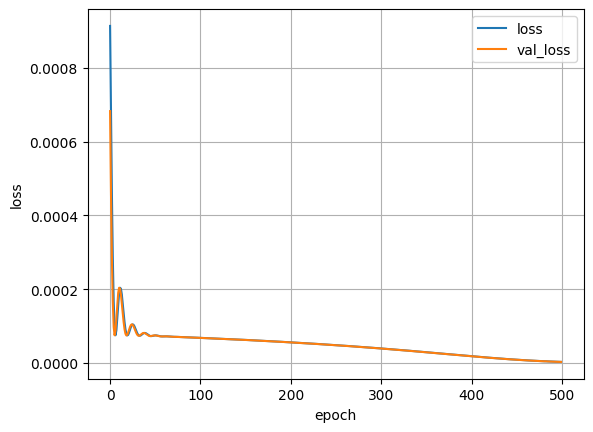

In [12]:
model.fit(X, Y,
          epochs=500,
          validation_data=(X, Y),
          callbacks=[plot_losses],
          verbose=0)

In [13]:
# evaluate the keras model
# Evalusi hasil proses pelatihan Deep Learning
# Hitung akurasi hasil pelatihan dalam bentuk Prosentase Keberhasilan
# Prosentase Keberhasilan = 100 - MAPE

#_, MAPE_pelatihan = model.evaluate(X_normal, Y_normal, batch_size=1)

_, MSE = model.evaluate(X, Y, batch_size=1)

#print('Prosentase_keberhasilan: %.2f' % (100-MAPE_pelatihan))

print('MSE : %.2f' % (MSE))

2/2 [==============================] - 0s 18ms/step - loss: 2.9449e-06 - mean_squared_error: 2.9449e-06
MSE : 0.00


In [14]:
# menjalankan fungsi prediksi
y_pred = model.predict(X)
print(y_pred)

1/1 [==============================] - 0s 144ms/step
[[0.40614048]
 [0.40076694]]


In [15]:
# Denormalisasi Data sebelum dibandngkan

a = np.max(AKI)
b = np.min(AKI)

# Rumus
# x_denormalisasi = (((x_normalisasi - 0.1)*(a - b))/0.8) + b

y_prediksi = (((y_pred - 0.1)*(a - b))/0.8) + b

print("y_prediksi =", y_prediksi)

y_prediksi = [[2.498235 ]
 [2.4921227]]


In [16]:
# Urut tahun, menggantikan indeks dari 0 s.d 1
urutan1 = ['2020',
       '2021',
       ]

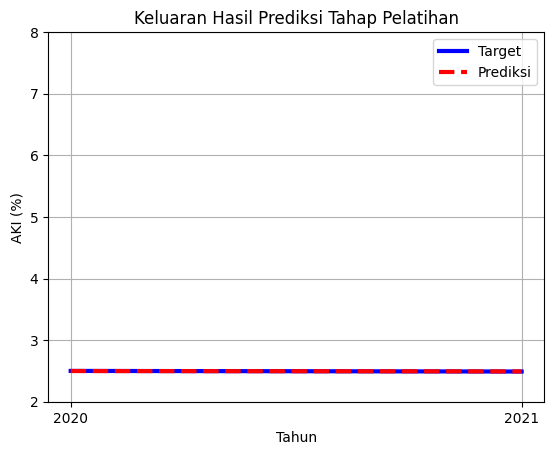

In [17]:
# Plot Keluaran Hasil Prediksi Tahap Pelatihan

plt.title('Keluaran Hasil Prediksi Tahap Pelatihan')
plt.plot(urutan1, AKI_Target, '-b', label='Target',linewidth=3, markersize=12)
plt.plot(urutan1, y_prediksi, '--r', label='Prediksi', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('AKI (%)')
plt.ylim((2,8))
plt.grid()

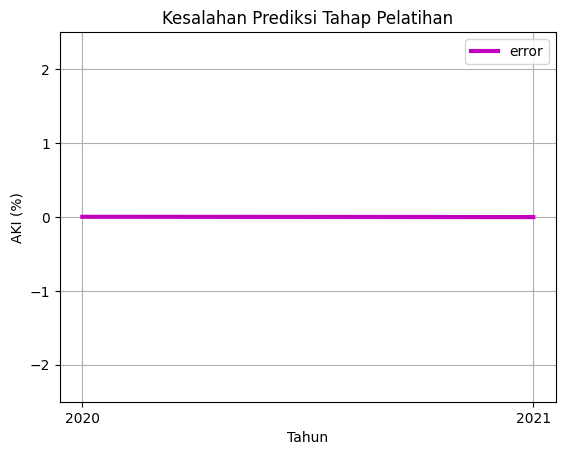

In [18]:
# Plot Kesalahan Prediksi

selisih = AKI_Target - y_prediksi.transpose()
plt.title('Kesalahan Prediksi Tahap Pelatihan')
plt.plot(urutan1, selisih.transpose(), '-m', label='error', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('AKI (%)')
plt.ylim((-2.5,2.5))
plt.grid()

In [19]:
# Pengukuran kinerja Deep Learning

from sklearn.metrics import mean_squared_error
from math import sqrt
mse  = mean_squared_error(AKI_Target, y_prediksi)
rmse = sqrt(mse)
print("mse =",mse)
print("rmse =",rmse)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE = mean_absolute_percentage_error(AKI_Target, y_prediksi)
print("MAPE =",MAPE)

Persentase_keberhasilan = 100-MAPE
print("Persentase_keberhasilan =", Persentase_keberhasilan)

mse = 3.810456810287635e-06
rmse = 0.0019520391415869802
MAPE = 0.20041596937370637
Persentase_keberhasilan = 99.79958403062629


# Prediksi AKI

# Tahap Pengujian

Input : mulai tahun 2001 sampai tahun 2020

Untuk Memprediksi AKI di Tahun 2021 dan 2022

In [20]:
# Urut tahun, menggantikan indeks dari 0 s.d 1
urutan2 = ['2021',
       '2022'
       ]

In [21]:
# Ujicoba prediksi
y_uji = model.predict(X1)
print('Hasil prediksi sebelum denormalisasi =', y_uji)

1/1 [==============================] - 0s 28ms/step
Hasil prediksi sebelum denormalisasi = [[0.40144804]
 [0.4095339 ]]


In [22]:
# Denormalisasi Data sebelum dibandngkan

a = np.max(AKI)
b = np.min(AKI)

# Rumus
# x_denormalisasi = (((x_normalisasi - 0.1)*(a - b))/0.8) + b

y_pengujian = (((y_uji - 0.1)*(a - b))/0.8) + b

print("y_pengujian =", y_pengujian)

y_pengujian = [[2.4928973]
 [2.502095 ]]


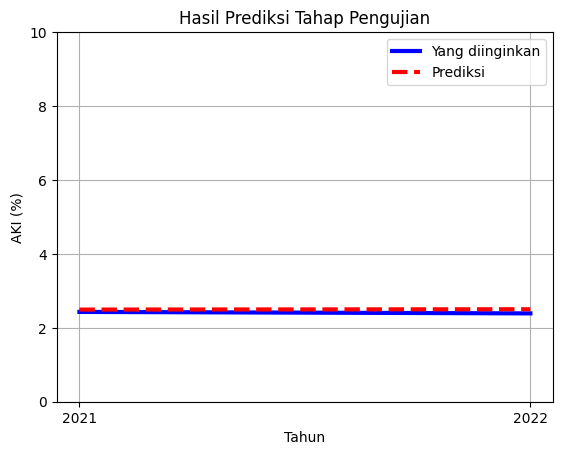

In [23]:
# Plot keluaran hasil prediksi Tahap Pengujian

plt.title('Hasil Prediksi Tahap Pengujian')
plt.plot(urutan2,  AKI_Target_Uji, '-b', label='Yang diinginkan',linewidth=3, markersize=12)
plt.plot(urutan2, y_pengujian, '--r', label='Prediksi', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('AKI (%)')
plt.ylim((0,10))
plt.grid()

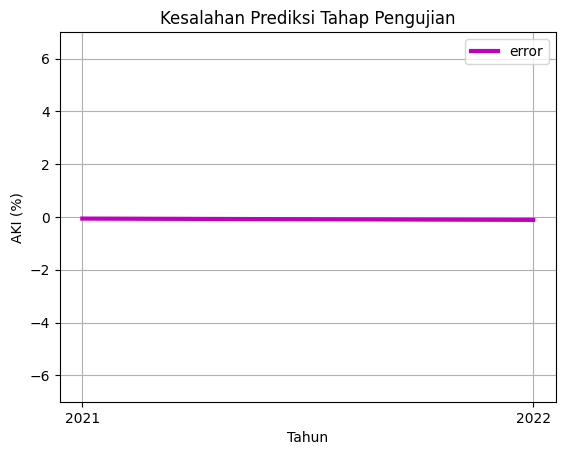

In [24]:
# Plot kesalahan prediksi Tahap Pengujian

selisih_pengujian = AKI_Target_Uji - y_pengujian.transpose()
plt.title('Kesalahan Prediksi Tahap Pengujian')
plt.plot(urutan2, selisih_pengujian.transpose(), '-m', label='error', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('AKI (%)')
plt.ylim((-7,7))
plt.grid()

In [25]:
# Pengukuran kinerja Deep Learning Tahap Pengujian

from sklearn.metrics import mean_squared_error
from math import sqrt
mse1  = mean_squared_error(AKI_Target_Uji, y_pengujian)
rmse1 = sqrt(mse1)
print("mse =",mse1)
print("rmse =",rmse1)

MAPE = mean_absolute_percentage_error(AKI_Target_Uji, y_pengujian)
print("MAPE =",MAPE)

Persentase_keberhasilan = 100-MAPE
print("Persentase_keberhasilan =", Persentase_keberhasilan)

mse = 0.008260676144535385
rmse = 0.09088826186331976
MAPE = 3.6376821922324387
Persentase_keberhasilan = 96.36231780776757
